## Analysis of Returned ballot data

In [28]:
## importing dependencies
import pandas as pd
import numpy as np
import os
import glob

In [29]:
test= pd.read_excel('~/Desktop/election_results/election_results/georgia.xlsx')

In [30]:
test.head()

,County,Trump,Biden,Jorgensen,Population,Registered voters,Cast votes,Voter turnout,Percent of county pop is registered voters
0,Towns,6384,1550,45,12037,10189,7979,0.783099,0.846473
1,Dawson,13393,2486,196,26108,21557,16075,0.745697,0.825686
2,Taliaferro,360,561,7,1537,1246,928,0.744783,0.810670
3,Fayette,36316,31863,931,114421,92427,69110,0.747725,0.807780
4,Union,12651,2801,108,24511,19235,15560,0.808942,0.784750


In [53]:
biden_count_georgia = test.Biden
trump_count_georgia = test.Trump

In [54]:
biden_county.describe()

count       159.000000
mean      15508.056604
std       47271.230692
min         155.000000
25%        1456.000000
50%        2879.000000
75%        7843.500000
max      379095.000000
Name: Biden, dtype: float64

In [55]:
import benfordslaw
import random

In [64]:
def benford_analysis(d):

    print("-----------------")
    print("| codedrome.com |")
    print("| Benford's Law |")
    print("-----------------\n")

    data = d
    #data = get_benford_data()

    print(len(data))

    benford_table = benfordslaw.calculate(data)
    print_as_table(benford_table)
    print()
    print_as_graph(benford_table)


def get_random_data():

    """
    Returns a list of 1000 numbers approximately
    following the uniform distribution NOT the
    Benford Distribution.
    """

    random_data = [0] * 1000

    random_data = list(map(lambda n: n + random.randint(1, 1000), random_data))

    return random_data


def get_benford_data():

    """
    Returns a list of about 1000 numbers
    approximately following the Benford Distribution.
    """

    benford_data = []

    for first_digit in range(1, 10):
        random_factor = random.uniform(0.8, 1.2)
        for num_count in range(1, int(1000 * benfordslaw.BENFORD_PERCENTAGES[first_digit] * random_factor)):
            start = first_digit * 1000
            benford_data.append(random.randint(start, start + 1000))

    return benford_data


def print_as_table(benford_table):

    width = 59

    print("-" * width)
    print("|   |      Data       |    Benford      |    Difference   |")
    print("| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |")
    print("-" * width)

    for item in benford_table:

        print("| {} | {:6.0f} | {:6.2f} | {:6.0f} | {:6.2f} | {:6.0f} | {:6.2f} |".format(item["n"],
                                   item["data_frequency"],
                                   item["data_frequency_percent"] * 100,
                                   item["benford_frequency"],
                                   item["benford_frequency_percent"] * 100,
                                   item["difference_frequency"],
                                   item["difference_frequency_percent"] * 100))

    print("-" * width)


def print_as_graph(benford_table):

    REDBG = "\x1B[41m"
    GREENBG = "\x1B[42m"
    RESET = "\x1B[0m"

    print("  0%       10%       20%       30%       40%       50%       60%       70%       80%       90%       100%")
    print("  |         |         |         |         |         |         |         |         |         |         |\n")

    for item in benford_table:

        print(" {} {}\n   {}\n  ".format(str(item["n"]),
                                         GREENBG + (" " * int(round(item["benford_frequency_percent"] * 100))) + RESET,
                                         REDBG + (" " * int(round(item["data_frequency_percent"] * 100))) + RESET))


In [57]:
benford_analysis(biden_count_georgia)

-----------------
| codedrome.com |
| Benford's Law |
-----------------

159
-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 1 |     46 |  28.93 |     48 |  30.10 |     -2 |  -1.17 |
| 2 |     41 |  25.79 |     28 |  17.60 |     13 |   8.19 |
| 3 |     16 |  10.06 |     20 |  12.50 |     -4 |  -2.44 |
| 4 |     21 |  13.21 |     15 |   9.70 |      6 |   3.51 |
| 5 |      7 |   4.40 |     13 |   7.90 |     -6 |  -3.50 |
| 6 |      9 |   5.66 |     11 |   6.70 |     -2 |  -1.04 |
| 7 |      8 |   5.03 |      9 |   5.80 |     -1 |  -0.77 |
| 8 |      6 |   3.77 |      8 |   5.10 |     -2 |  -1.33 |
| 9 |      5 |   3.14 |      7 |   4.60 |     -2 |  -1.46 |
-----------------------------------------------------------

  0%       10%       20%       30%       40%       50%       60%       70%       8

In [65]:
benford_analysis(trump_count_georgia)

-----------------
| codedrome.com |
| Benford's Law |
-----------------

159
-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 1 |     43 |  27.04 |     48 |  30.10 |     -5 |  -3.06 |
| 2 |     35 |  22.01 |     28 |  17.60 |      7 |   4.41 |
| 3 |     13 |   8.18 |     20 |  12.50 |     -7 |  -4.32 |
| 4 |     14 |   8.81 |     15 |   9.70 |     -1 |  -0.89 |
| 5 |     10 |   6.29 |     13 |   7.90 |     -3 |  -1.61 |
| 6 |     17 |  10.69 |     11 |   6.70 |      6 |   3.99 |
| 7 |      8 |   5.03 |      9 |   5.80 |     -1 |  -0.77 |
| 8 |     10 |   6.29 |      8 |   5.10 |      2 |   1.19 |
| 9 |      9 |   5.66 |      7 |   4.60 |      2 |   1.06 |
-----------------------------------------------------------

  0%       10%       20%       30%       40%       50%       60%       70%       8

In [59]:
michigan_data= pd.read_excel('~/Desktop/election_results/election_results/michigan.xlsx')

In [61]:
michigan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   County                                      83 non-null     object 
 1   Trump                                       83 non-null     int64  
 2   De La Fuente                                83 non-null     int64  
 3   Hawkins                                     83 non-null     int64  
 4   Biden                                       83 non-null     int64  
 5   Jorgensen                                   83 non-null     int64  
 6   Blankenship                                 83 non-null     int64  
 7   Population                                  83 non-null     int64  
 8   Registered voters                           83 non-null     int64  
 9   Cast votes                                  83 non-null     int64  
 10  Voter turnout   

In [66]:
biden_count_michigan = michigan_data.Biden
trump_count_michigan = michigan_data.Trump

In [67]:
benford_analysis(biden_count_michigan)
benford_analysis(trump_count_michigan)

-----------------
| codedrome.com |
| Benford's Law |
-----------------

83
-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 1 |     15 |  18.07 |     25 |  30.10 |    -10 | -12.03 |
| 2 |     17 |  20.48 |     15 |  17.60 |      2 |   2.88 |
| 3 |      9 |  10.84 |     10 |  12.50 |     -1 |  -1.66 |
| 4 |      8 |   9.64 |      8 |   9.70 |     -0 |  -0.06 |
| 5 |     11 |  13.25 |      7 |   7.90 |      4 |   5.35 |
| 6 |      9 |  10.84 |      6 |   6.70 |      3 |   4.14 |
| 7 |      5 |   6.02 |      5 |   5.80 |      0 |   0.22 |
| 8 |      4 |   4.82 |      4 |   5.10 |     -0 |  -0.28 |
| 9 |      5 |   6.02 |      4 |   4.60 |      1 |   1.42 |
-----------------------------------------------------------

  0%       10%       20%       30%       40%       50%       60%       70%       80

In [71]:
import matplotlib.pyplot as plt

TypeError: '<' not supported between instances of 'function' and 'float'

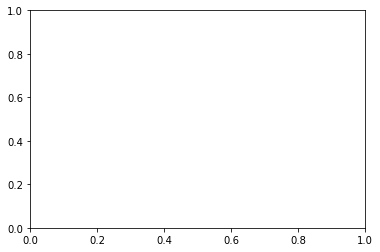

In [73]:
plt.hist(get_benford_data)